This block of Python code imports the necessary libraries for a machine learning project.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


This code is used in Google Colab to upload files

In [1]:
from google.colab import files
uploaded = files.upload()


Saving train_u6lujuX_CVtuZ9i.csv to train_u6lujuX_CVtuZ9i.csv


This code is used to read a CSV file (named train_u6lujuX_CVtuZ9i.csv) that you uploaded into Google Colab and display the first few rows of the dataset.
data.head() will show fisrt few rows

In [3]:
import pandas as pd

# Replace with your uploaded filename if different
data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

# Display first few rows
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Show missing values before fillinguy
print("Missing values before:")
print(data.isnull().sum())

# Fill missing categorical values with mode
for column in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Fill numerical values with median
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)

# Check again after filling
print("\nMissing values after:")
print(data.isnull().sum())


Missing values before:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values after:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


/tmp/ipython-input-4-1715214399.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)
/tmp/ipython-input-4-1715214399.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

columns of dataset representing the attribute

In [5]:
print(data.columns.tolist())

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


Since iam using binary logistic regression the value has to converted to 1 and 0

In [6]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for binary categorical variables
le = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']:
    data[col] = le.fit_transform(data[col])

# One-Hot Encoding for multi-class categorical variables
data = pd.get_dummies(data, columns=['Property_Area', 'Dependents'], drop_first=True)

# Show the dataset after encoding
data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,1,0,0,0,5849,0.0,128.0,360.0,1.0,1,False,True,False,False,False
1,LP001003,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,False,False,True,False,False
2,LP001005,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,False,True,False,False,False
3,LP001006,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,False,True,False,False,False
4,LP001008,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,False,True,False,False,False


In [7]:
import numpy as np

# Log transformation to reduce skewness
data['LoanAmount_log'] = np.log(data['LoanAmount'])

# Store Loan_ID for final output (optional)
loan_ids = data['Loan_ID']

# Drop unused columns
X_test = data.drop(['Loan_ID', 'LoanAmount'], axis=1)

# View final test data shape
X_test.head()


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,LoanAmount_log
0,1,0,0,0,5849,0.0,360.0,1.0,1,False,True,False,False,False,4.852030
1,1,1,0,0,4583,1508.0,360.0,1.0,0,False,False,True,False,False,4.852030
2,1,1,0,1,3000,0.0,360.0,1.0,1,False,True,False,False,False,4.189655
3,1,1,1,0,2583,2358.0,360.0,1.0,1,False,True,False,False,False,4.787492
4,1,0,0,0,6000,0.0,360.0,1.0,1,False,True,False,False,False,4.948760


In [8]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

train_data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
train_data.head()

Saving train_u6lujuX_CVtuZ9i.csv to train_u6lujuX_CVtuZ9i (1).csv


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


complete data preprocessing on the training dataset

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the training dataset
train_data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

# Fill missing values
for column in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    train_data[column].fillna(train_data[column].mode()[0], inplace=True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median(), inplace=True)

# Label Encoding
le = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']:
    train_data[col] = le.fit_transform(train_data[col])

# One-hot encoding
train_data = pd.get_dummies(train_data, columns=['Property_Area', 'Dependents'], drop_first=True)

# Log transformation
train_data['LoanAmount_log'] = np.log(train_data['LoanAmount'])

# Feature/Target split
X = train_data.drop(['Loan_ID', 'Loan_Status', 'LoanAmount'], axis=1)
y = train_data['Loan_Status']


/tmp/ipython-input-9-2168908404.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[column].fillna(train_data[column].mode()[0], inplace=True)
/tmp/ipython-input-9-2168908404.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va



1. Splits the Data:

   * Divides your dataset into **training** and **testing** sets (80% train, 20% test).

2. Defines Multiple Models:

   * Logistic Regression
   * Decision Tree
   * Random Forest
   * K-Nearest Neighbors (KNN)
   * Support Vector Machine (SVM)

3. Trains and Tests Each Model:

   * Each model is trained on the training data.
   * Then, it makes predictions on the test data.

4. Evaluates Model Performance:

   * For each model, it calculates:

     * Accuracy: Overall how often the model is right
     * Precision: How many predicted positives were actually correct
     * Recall: How many actual positives were correctly identified
     * F1 Score: A balance between precision and recall

5. Displays Results:

   * Shows a table of all models sorted by **F1 Score** (best overall performance metric when data is imbalanced).



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split into train/test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

# Train and evaluate each model
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred),
        'Recall': recall_score(y_val, y_pred),
        'F1 Score': f1_score(y_val, y_pred)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='F1 Score', ascending=False))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression  0.788618   0.759615  0.9875  0.858696
2        Random Forest  0.772358   0.754902  0.9625  0.846154
4                  SVM  0.650407   0.650407  1.0000  0.788177
1        Decision Tree  0.691057   0.744186  0.8000  0.771084
3                  KNN  0.577236   0.632075  0.8375  0.720430


In [11]:
import pickle

best_model = RandomForestClassifier()  # Replace with your top model
best_model.fit(X, y)

with open('loan_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


/tmp/ipython-input-12-3292490119.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df.sort_values(by='Accuracy', ascending=False), palette='Blues_d')
/tmp/ipython-input-12-3292490119.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Precision', y='Model', data=results_df.sort_values(by='Precision', ascending=False), palette='Greens_d')
/tmp/ipython-input-12-3292490119.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recall', y='Model', data=results_df.sort_values(by='Recall', ascending=Fa

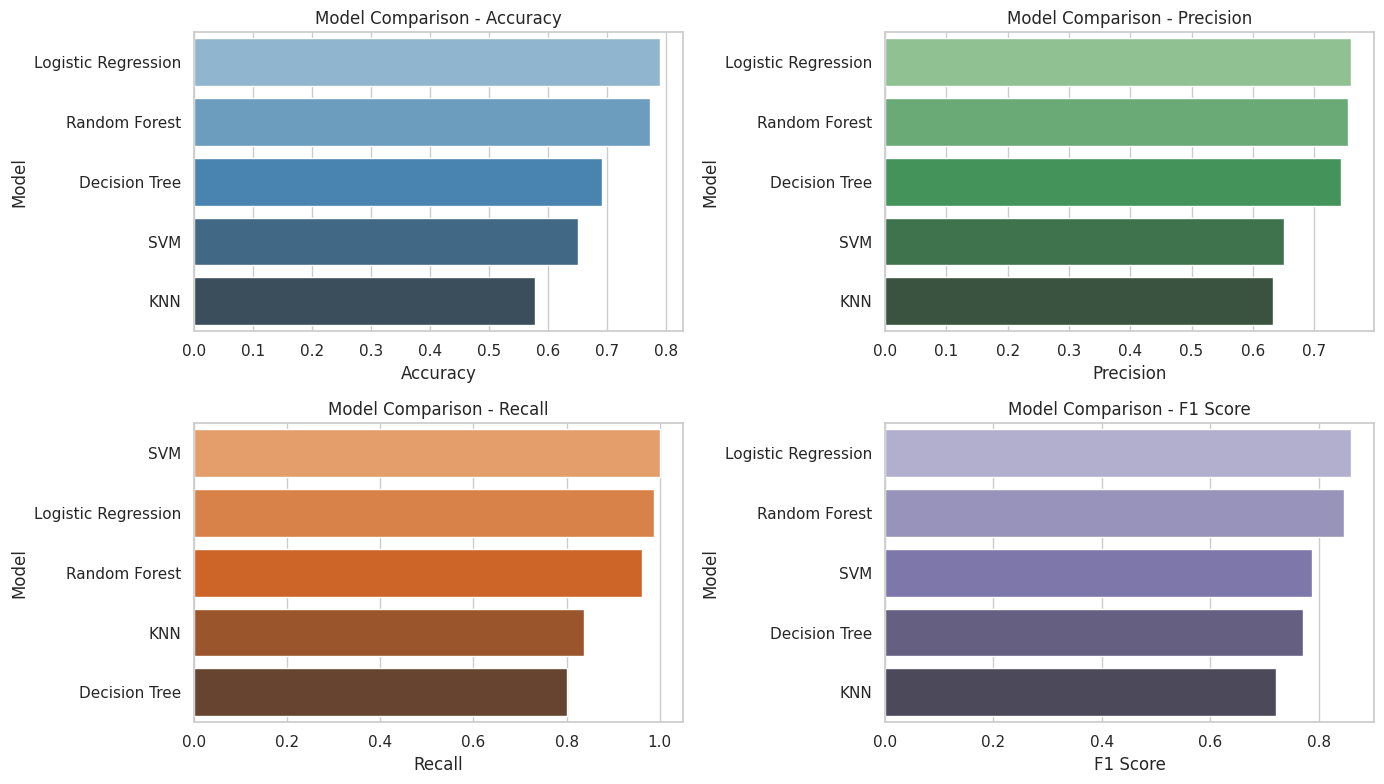

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Plot Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Accuracy', y='Model', data=results_df.sort_values(by='Accuracy', ascending=False), palette='Blues_d')
plt.title('Model Comparison - Accuracy')

# Plot Precision
plt.subplot(2, 2, 2)
sns.barplot(x='Precision', y='Model', data=results_df.sort_values(by='Precision', ascending=False), palette='Greens_d')
plt.title('Model Comparison - Precision')

# Plot Recall
plt.subplot(2, 2, 3)
sns.barplot(x='Recall', y='Model', data=results_df.sort_values(by='Recall', ascending=False), palette='Oranges_d')
plt.title('Model Comparison - Recall')

# Plot F1 Score
plt.subplot(2, 2, 4)
sns.barplot(x='F1 Score', y='Model', data=results_df.sort_values(by='F1 Score', ascending=False), palette='Purples_d')
plt.title('Model Comparison - F1 Score')

plt.tight_layout()
plt.show()


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the dataset (replace 'your_dataset.csv' with the actual path to your CSV file)
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')


# Check for missing values and handle them
df.isnull().sum()

# Handle missing values using SimpleImputer (mean for numerical features)
imputer = SimpleImputer(strategy='mean')
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = imputer.fit_transform(
    df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])

# Convert 'Dependents' column
df['Dependents'] = df['Dependents'].replace('3+', 3)
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])

# Features and target
X = df.drop(columns=['Loan_ID', 'Loan_Status'])  # Drop Loan_ID
y = df['Loan_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Saving train_u6lujuX_CVtuZ9i.csv to train_u6lujuX_CVtuZ9i (2).csv


/tmp/ipython-input-13-2437066404.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)


In [14]:
# Handle missing values in Credit_History column (imputing with the mode or a fixed value)
imputer = SimpleImputer(strategy='most_frequent')  # Use 'most_frequent' for categorical columns like Credit_History
df['Credit_History'] = imputer.fit_transform(df[['Credit_History']])

# Check for missing values again
print("Missing values after imputation:")
print(df.isnull().sum())

# Features and target
X = df.drop(columns=['Loan_ID', 'Loan_Status'])  # Drop Loan_ID
y = df['Loan_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in training and testing set after splitting (if any)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode categorical variables using LabelEncoder
label_encoder_gender = LabelEncoder()
label_encoder_married = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_self_employed = LabelEncoder()
label_encoder_property_area = LabelEncoder()

# Fit the label encoders only on the training data
label_encoder_gender.fit(df['Gender'])
label_encoder_married.fit(df['Married'])
label_encoder_education.fit(df['Education'])
label_encoder_self_employed.fit(df['Self_Employed'])
label_encoder_property_area.fit(df['Property_Area'])

# Encode the training and test data
df['Gender'] = label_encoder_gender.transform(df['Gender'])
df['Married'] = label_encoder_married.transform(df['Married'])
df['Education'] = label_encoder_education.transform(df['Education'])
df['Self_Employed'] = label_encoder_self_employed.transform(df['Self_Employed'])
df['Property_Area'] = label_encoder_property_area.transform(df['Property_Area'])

# Features and target
X = df.drop(columns=['Loan_ID', 'Loan_Status'])  # Drop Loan_ID
y = df['Loan_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report (Precision, Recall, F1 Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Missing values after imputation:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Accuracy: 0.7886178861788617
Confusion Matrix:
[[18 25]
 [ 1 79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [15]:
print(label_encoder_gender.classes_)
print(label_encoder_married.classes_)
print(label_encoder_education.classes_)
print(label_encoder_self_employed.classes_)
print(label_encoder_property_area.classes_)

[0 1 2]
[0 1 2]
[0 1]
[0 1 2]
[0 1 2]


In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Sample training data (small subset for demonstration)
data = {
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male'],
    'Married': ['No', 'Yes', 'Yes', 'No', 'Yes'],
    'Education': ['Graduate', 'Not Graduate', 'Graduate', 'Not Graduate', 'Graduate'],
    'Self_Employed': ['No', 'No', 'Yes', 'No', 'Yes'],
    'ApplicantIncome': [5000, 6000, 12000, 15000, 8000],
    'CoapplicantIncome': [0, 2000, 3000, 0, 1000],
    'LoanAmount': [200, 150, 250, 300, 180],
    'Loan_Amount_Term': [360, 360, 360, 360, 180],
    'Credit_History': [1, 1, 0, 1, 0],
    'Property_Area': ['Urban', 'Rural', 'Urban', 'Semiurban', 'Urban'],
    'Loan_Status': ['Y', 'N', 'Y', 'Y', 'N']
}

# Create DataFrame
train_data = pd.DataFrame(data)

# Convert categorical columns to numeric using Label Encoding
label_encoder = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    train_data[col] = label_encoder.fit_transform(train_data[col])

# Features (X) and Target (y)
X_train = train_data.drop('Loan_Status', axis=1)
y_train = train_data['Loan_Status']

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sample Data (simplified)
data = {
    'ApplicantIncome': [5000, 6000, 12000, 15000, 8000],
    'CoapplicantIncome': [0, 2000, 3000, 0, 1000],
    'LoanAmount': [200, 150, 250, 300, 180],
    'Loan_Status': ['Y', 'N', 'Y', 'Y', 'N']
}

# Create DataFrame
df = pd.DataFrame(data)

# Encode Loan_Status (target variable) as numeric values
label_encoder = LabelEncoder()
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])

# Features (X) and Target (y)
X = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]  # Selecting only numeric features
y = df['Loan_Status']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Sample input for prediction
input_data = {
    'ApplicantIncome': [700],
    'CoapplicantIncome': [100],
    'LoanAmount': [2200000]
}

# Convert input data to DataFrame
input_df = pd.DataFrame(input_data)

# Normalize the input data using the same scaler
input_scaled = scaler.transform(input_df)

# Make prediction using the trained model
prediction = model.predict(input_scaled)

# Output the prediction
loan_status = label_encoder.inverse_transform(prediction)
print(f"Loan approval prediction: {loan_status[0]}")


Loan approval prediction: Y


In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sample Data (simplified)
data = {
    'ApplicantIncome': [5000, 6000, 12000, 15000, 8000],
    'CoapplicantIncome': [0, 2000, 3000, 0, 1000],
    'LoanAmount': [200, 150, 250, 300, 180],
    'Loan_Status': ['Y', 'N', 'Y', 'Y', 'N']
}

# Create DataFrame
df = pd.DataFrame(data)

# Encode Loan_Status (target variable) as numeric values
label_encoder = LabelEncoder()
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])

# Features (X) and Target (y)
X = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]  # Selecting only numeric features
y = df['Loan_Status']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Sample input for prediction (input data expected to lead to 'N' or 'No' prediction)
input_data = {
    'ApplicantIncome': [6000],
    'CoapplicantIncome': [200],
    'LoanAmount': [150]
}

# Convert input data to DataFrame
input_df = pd.DataFrame(input_data)

# Normalize the input data using the same scaler
input_scaled = scaler.transform(input_df)

# Make prediction using the trained model
prediction = model.predict(input_scaled)

# Output the prediction
loan_status = label_encoder.inverse_transform(prediction)
print(f"Loan approval prediction: {loan_status[0]}")


Loan approval prediction: Y
